In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.options.display.max_columns = None


# LA GRAN PANDEMIA

### contenido del data set COVID
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

### Limpieza de datos

Realizaremos una exploracion de los datos para buscar datos faltantes, duplicados y en su caso extremos. 

In [2]:
df_covid = pd.read_csv('./data/Covid Data.csv')

In [20]:
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [21]:
df_covid.shape

(1048575, 21)

In [22]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

#### Buscamos datos nulos

En nuestro dataset los valores 97 y 99 se consideran como data faltante. Por lo tanto, los reemplazaremos por NaN y luego se quitaran. 

In [23]:
# reemplazamos todos los 97 y 99 por NaN

df_covid.replace(97, np.nan, inplace=True)
df_covid.replace(98, np.nan, inplace=True)
df_covid.replace(99, np.nan, inplace=True)

df_covid.isnull().sum()


USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [24]:
#porcentaje de datos faltantes por columna

df_covid.isnull().sum()/df_covid.shape[0]

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                     0.000000
PATIENT_TYPE            0.000000
DATE_DIED               0.000000
INTUBED                 0.816221
PNEUMONIA               0.015262
AGE                     0.000329
PREGNANT                0.502840
DIABETES                0.003183
COPD                    0.002864
ASTHMA                  0.002841
INMSUPR                 0.003246
HIPERTENSION            0.002960
OTHER_DISEASE           0.004811
CARDIOVASCULAR          0.002934
OBESITY                 0.002892
RENAL_CHRONIC           0.002867
TOBACCO                 0.003071
CLASIFFICATION_FINAL    0.000000
ICU                     0.816377
dtype: float64

<Axes: >

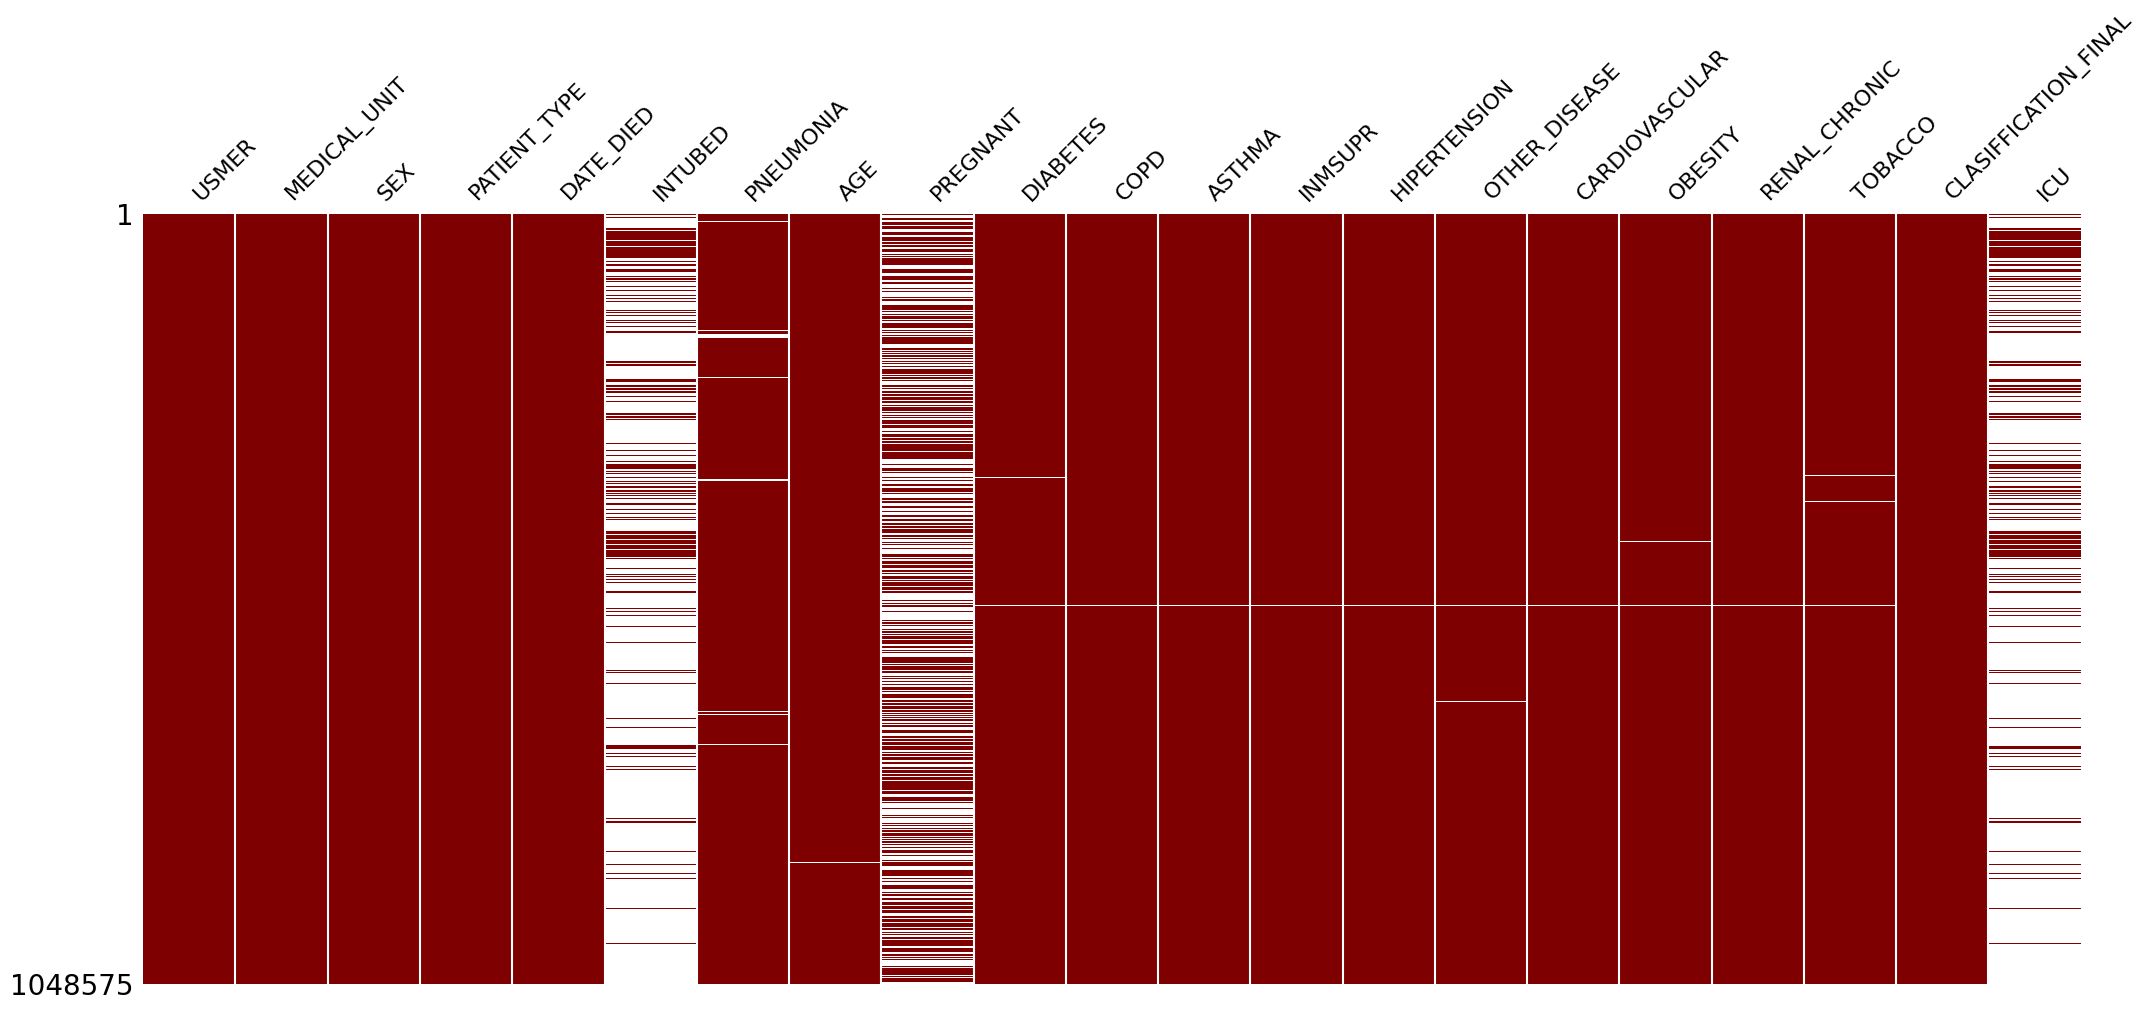

In [25]:
msno.matrix(df_covid, color=(0.5, 0, 0), sparkline=False)


In [40]:
# ver datos unicos

df_covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               400
INTUBED                   2
PNEUMONIA                 2
AGE                     117
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
ICU                       2
fallecidos                2
mes                      12
dtype: int64

Podemos observar que tenemos 5 campos con datos faltantes en el dataset. El dataset cuenta con un total de 1048575 de registros. Como vemos en la tabla, los campos con datos faltantes son: Intubados, neumonia, edad, embarazo y terapita_intensiva. 
De estos campos, Intubados y terapia_intensiva tienen un 81% de datos faltantes y embarazos 49%. Si no fueran variables con un significativo peso dentro de la evolucion de la enfermedad se podria elimiar del dataset pero se decidio mantenerlas para su analisis.

In [29]:
df_covid.shape

(1048575, 21)

#### Buscamos datos duplicados

In [30]:
df_covid.duplicated().sum()

812074

Tenemos 814264 registros duplicados. Pero en este caso es normal por que son registros de personas contagiadas y es posible que compartan las caracteristicas con otras personas. 

### Creamos el campo fallecido

El campo Date died indica mediante la fecha si el paciente murio y si no murio pone 9999-99-99. Creamos un campo de fallecido que sera 1 si murio y 2 si no murio. Esto permitira una mejor lectura y un mejor uso de los datos en el momento de realizar el modelo de prediccion.

In [31]:
# creamos el campo fallecidos a partir del campo date died. Si hay fecha el paciente fallecio, si la fecha es 9999-99-99 el paciente no fallecio.

df_covid['fallecidos'] = df_covid['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,fallecidos
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1


In [32]:
# paso a datetime la columna date_died

df_covid['DATE_DIED'] = df_covid['DATE_DIED'].replace('9999-99-99', np.nan)


df_covid['DATE_DIED'] = pd.to_datetime(df_covid['DATE_DIED'], format='%d/%m/%Y')


# agrego una columna mes para poder hacer un analisis por mes

df_covid['mes'] = pd.to_datetime(df_covid['DATE_DIED']).dt.month

df_covid['mes_nombre'] = df_covid['DATE_DIED'].dt.strftime('%B')


In [33]:
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,fallecidos,mes,mes_nombre
0,2,1,1,1,2020-05-03,NaN,1.0,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,5.0,May
1,2,1,2,1,2020-06-03,NaN,1.0,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,6.0,June
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,6.0,June
3,2,1,1,1,2020-06-12,NaN,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,6.0,June
4,2,1,2,1,2020-06-21,NaN,2.0,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,6.0,June


In [34]:
# # paso columna mes de float a int

# df_covid['mes'].fillna(0, inplace=True)

# df_covid['mes'] = df_covid['mes'].astype(int)

# df_covid.dtypes


In [35]:
# reemplazo los valores 2 por 0 en todo el dataset pero menos en CLASIFICACION_FINAL, USMER y mes

# Lista de columnas en las que se reemplazarán los valores 2 por 0
columnas_reemplazo = [col for col in df_covid.columns if col not in ["CLASIFFICATION_FINAL", "USMER", "mes"]]

# Reemplazo de valores

df_covid[columnas_reemplazo] = df_covid[columnas_reemplazo].replace(2, 0)





        

df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,fallecidos,mes,mes_nombre
0,2,1,1,1,2020-05-03,NaN,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1,5.0,May
1,2,1,0,1,2020-06-03,NaN,1.0,72.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1,6.0,June
2,2,1,0,0,2020-06-09,1.0,0.0,55.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1,6.0,June
3,2,1,1,1,2020-06-12,NaN,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1,6.0,June
4,2,1,0,1,2020-06-21,NaN,0.0,68.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1,6.0,June


## Guardamos el dataset limpio

In [36]:
df_covid.to_csv('./data/covid_clean_total.csv', index=False)